# Part - I: GDP Analysis of Indian States

As a Chief Data Scientist reporting to the CEO of Niti Ayog, the key goal of undertaking this project on Analysis of State GDPs, Sector / Sub-Sector etc. wise contribution, Drop out rates in education etc. is to provide top-level recommendations to the Chief Ministers (CMs) of various states, in order to help them identify the areas to focus on, which in turn will foster economic development for their respective states.

## Part I-A

The focus of analysis in this segment is on the dataset that contains the GSDP (Gross State Domestic Product) data for the states and union territories.

In [150]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# Read the Data Set
state = pd.read_csv("./Dataset I-A/ab40c054-5031-4376-b52e-9813e776f65e.csv")

<font color=blue>**Data Pre-Processing**</font>: Comprises of 
- Removing Rows that we are not focussing on here e.g. year 2016-17
- Analyzing the Data Quality issues e.g. NaN values, etc.

<font color=Red>**TASK**</font>
Remove the rows '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [152]:
# Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17
state_before_2016 = state[state.Duration != '2016-17']

# Resetting Index
state_before_2016 = state_before_2016.set_index('Items  Description')

# Checking for Null Values across Columns
state_before_2016.isnull().sum()

Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             2
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  2
Manipur                      2
Meghalaya                    0
Mizoram                      2
Nagaland                     2
Odisha                       0
Punjab                       2
Rajasthan                    2
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      2
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 9
Andaman & Nicobar Islands    2
Chandigarh                   0
Delhi   

**Observation**: West Bengal has all NaN values, Other states like HP, Maharashtra, Manipur, Mizoram, Nagaland, Punjab, Rajasthan, Tripura, A&I have 2 missing values each. Therefore, there are more states with 2 missing values 

In [153]:
# Checking Rows having atleast 1 missing value
state_before_2016.isnull().any(axis=1)

Items  Description
GSDP - CURRENT PRICES (` in Crore)    True
GSDP - CURRENT PRICES (` in Crore)    True
GSDP - CURRENT PRICES (` in Crore)    True
GSDP - CURRENT PRICES (` in Crore)    True
GSDP - CURRENT PRICES (` in Crore)    True
(% Growth over previous year)         True
(% Growth over previous year)         True
(% Growth over previous year)         True
(% Growth over previous year)         True
dtype: bool

**Observation**: All Rows have atleast 1 missing value

<font color=Green>**Approach on West Bengal**</font>: The Missing values and the decision on the column for the state of West Bengal will be taken further down. There could be a possibility of finding the values for West Bengal state by subtracting the cumulative of all the other state values from the All India Total (given in the last column)

<font color=Green>**Approach on Missing Values**</font>: 
- The decision again will be taken further down on whether to remove these rows or replace / impute them with Mean Values
- Also, care must be taken while imputing values because if we see row-wise, half the dataset comprises of GSDP values and the other half the % Growth Values. Therefore, calculating one common mean() value and imputing the same across a particular column won't work

<font color=Blue>**Data Preparation**</font>: Comprises of 
- Slicing and Dicing data sets into convenient sub-sets that will be used / referred to multiple times during the analysis

In [154]:
# List of all State Names
state_cols = list(state_before_2016.iloc[:,1:].columns)

# Split df_new to gsdp rows and growth rows as the mean for each range is different.
# Mean is required to impute values
state_gsdp_rows = state_before_2016.iloc[:5,:]
state_growth_rows = state_before_2016.iloc[5:,:]

In [155]:
# Impute all NaN values in GSDP values by Mean
for i in state_cols:
    state_gsdp_rows.loc[np.isnan(state_gsdp_rows[i]), i] = state_gsdp_rows[i].mean()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [156]:
# Calculating for West Bengal. Assuming the GSDP will be almost the differential from overall All India GDP
# Even though there seem to be 4 UTs missing but as they are small in size we can assume the absolute value for WB
for i in range(5):
    state_gsdp_rows.iloc[i,-6] = (state_gsdp_rows.iloc[i,-1] - state_gsdp_rows.iloc[i,1:-1].sum())

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


**Observation**: Even though we have calculated the value for 'West Bengal' but subtracting the cumulative of other states from All India Total, the value for year 2015-16 seems to be **UNUSUALLY HIGH**

In [157]:
# Calculating Growth Rates for WB
for i in range(4):
    for j in range(1,35):
        if(np.isnan(state_growth_rows.iloc[i,j])):
            state_growth_rows.iloc[i,j] = round(((state_gsdp_rows.iloc[i+1,j] - state_gsdp_rows.iloc[i,j]) / (state_gsdp_rows.iloc[i,j])),4)*100

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


**Observation**: Again after imputing for Growth Rates for West Bengal we see that the value for year 2015-16 is **UNUSALLY HIGH**. Therefore, we will have to **DROP** West Bengal for further analysis

In [158]:
# Concat the state_gsdp_rows and state_gsdp_rows to get back original dataframe
state_before_2016_updated = pd.concat([state_gsdp_rows,state_growth_rows],axis=0)

<font color=Red>**TASK**</font>
Calculate the average growth of states over the duration 2013-14 to 2015-16 and plot it for the states

In [159]:
# average growth of states over the duration 2013-14, 2014-15 and 2015-16 
# by taking the mean of the row '(% Growth over previous year)'
state_growth_rows_after2013 = state_growth_rows[state_growth_rows.Duration != '2012-13']
state_growth_rows_after2013_list = [round(state_growth_rows_after2013[i].mean(),2) for i in state_cols]

state_avg_growth_rates_df = pd.DataFrame({'state_cols':state_cols,'state_avg_growth_rates':state_growth_rows_after2013_list})

state_avg_growth_rates_df: Variable has the average growth of states over the duration of 2013-14,2014-15, 2015-16

In [160]:
# Store All India GDP Avg Growth Rate
all_india_gdp_avg_growth_rate = round(state_avg_growth_rates_df.iloc[-1,0],2)

# Remove All India GDP and West Bengal Numbers to plot the required Graph
state_avg_growth_rates_df = state_avg_growth_rates_df[state_avg_growth_rates_df.state_cols != 'All_India GDP']
state_avg_growth_rates_df = state_avg_growth_rates_df[state_avg_growth_rates_df.state_cols != 'West Bengal1']

In [161]:
# Calculating an additional field on the difference of each state's average growth rate vs. overall all india gdp average growth rate
state_avg_growth_rates_df['diff_from_all_india_avg'] = state_avg_growth_rates_df['state_avg_growth_rates'] - all_india_gdp_avg_growth_rate

# Sorting the DataFrame  based on the state_avg_growth_rates values
state_avg_growth_rates_df = state_avg_growth_rates_df.sort_values(by='state_avg_growth_rates',ascending=False)
# Resetting the index to state_cols
state_avg_growth_rates_df = state_avg_growth_rates_df.set_index('state_cols')

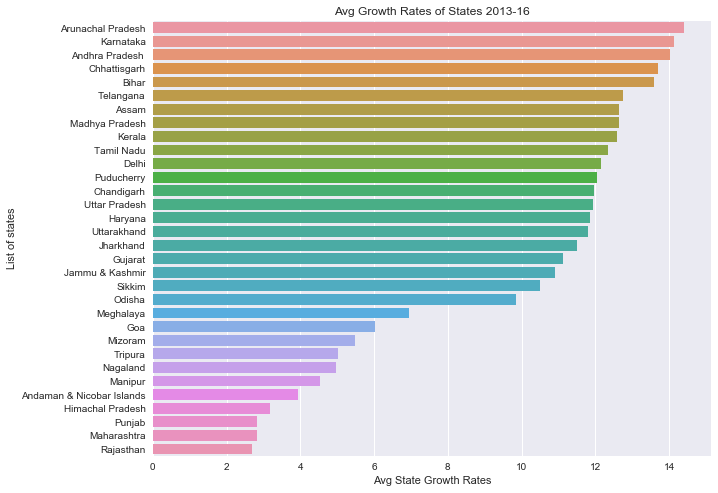

In [162]:
# Plot Avg Growth Rate 
plt.figure(figsize=(10, 8))

sns_plot = sns.barplot(y=state_avg_growth_rates_df.index,x='state_avg_growth_rates',data=state_avg_growth_rates_df)
sns_plot.figure.savefig('Part IA - Avg Growth Rates of States 2013-16')
plt.title('Avg Growth Rates of States 2013-16')
plt.xlabel('Avg State Growth Rates')
plt.ylabel('List of states')
plt.show()

<font color=Red>**TASK**</font>
Identify which states have ben growing consistently fast and which ones have been struggling

In [172]:
# Which State have been growing faster than All India Avg
states_growing_more_than_allindia = state_avg_growth_rates_df[state_avg_growth_rates_df['diff_from_all_india_avg'] > 0]
states_growing_more_than_allindia = states_growing_more_than_allindia.sort_values(by='diff_from_all_india_avg',ascending=False)

In [173]:
# Which State have been growing slower than All India Avg
states_growing_less_than_allindia = state_avg_growth_rates_df[state_avg_growth_rates_df['diff_from_all_india_avg'] < 0]
states_growing_less_than_allindia = states_growing_less_than_allindia.sort_values(by='diff_from_all_india_avg',ascending=True)

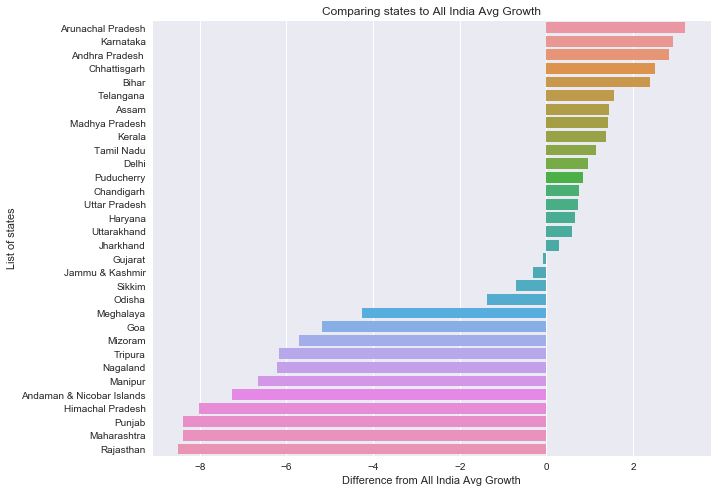

In [174]:
# Plot States Growing Faster and Slower than All India Avg. Derived Compared to National Average growth
plt.figure(figsize=(10, 8))

sns_plot = sns.barplot(y=state_avg_growth_rates_df.index,x='diff_from_all_india_avg', data=state_avg_growth_rates_df)
sns_plot.figure.savefig('Part 1A - States that have been growing and struggling consistently')
plt.title('Comparing states to All India Avg Growth')
plt.xlabel('Difference from All India Avg Growth')
plt.ylabel('List of states')
plt.show()

**Observation**: Based on the above graph we can see that for Arunachal Pradesh, Karnatak, Andhra Pradesh,Chattisgarh and Bihar have had their state avg considerably greater than the national average over the period 2013-16 

In [166]:
state_names = state_cols
state_names.remove('All_India GDP')
state_names.remove('West Bengal1')

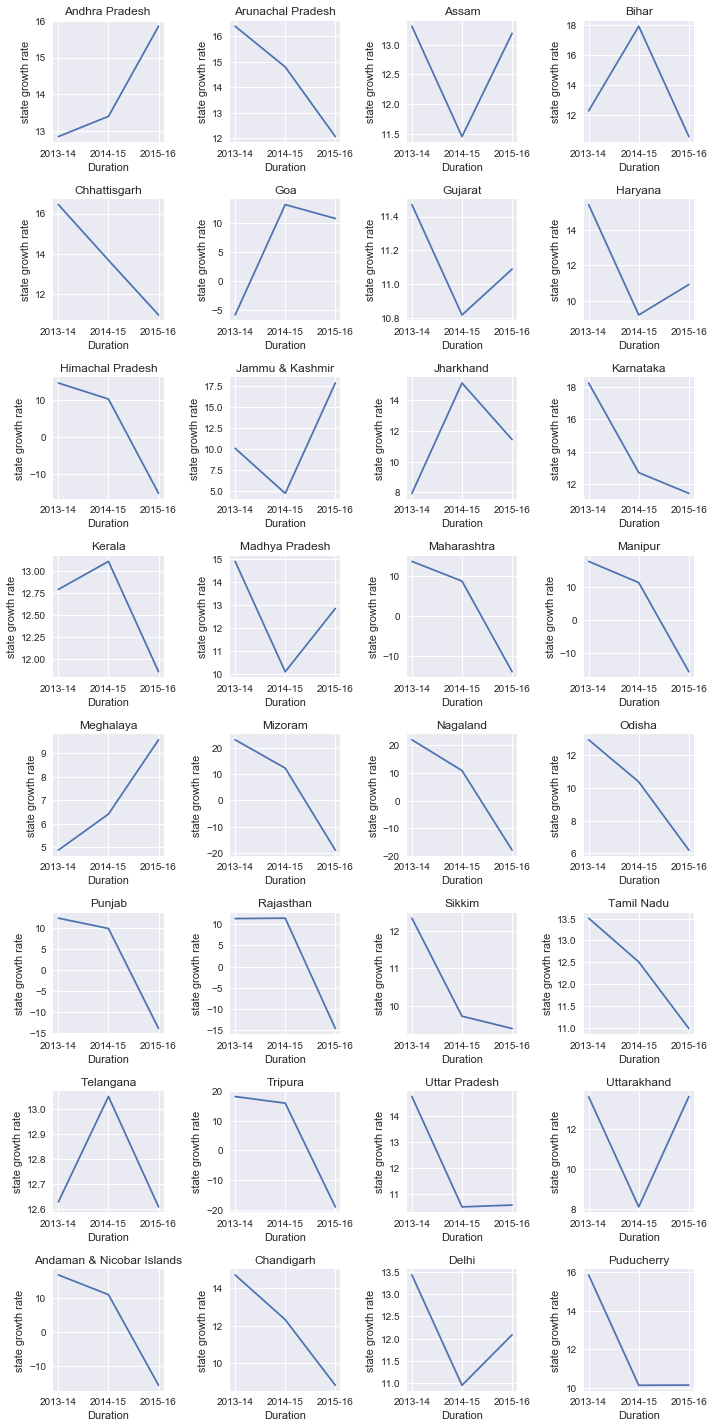

In [168]:
j=1
#plt.figure(40,30)
plt.subplots(8,4,figsize=(10,20))
for i in state_names:
    plt.subplot(8,4,j)
    j = j+1
    plt.plot(state_growth_rows_after2013['Duration'],state_growth_rows_after2013[i])
    plt.ylabel('state growth rate')
    plt.xlabel('Duration')
    plt.title(i)

plt.tight_layout()
plt.show()

**Observation** - From the above graphs we can see that the states that have been consistently growing for the period 2013-16 are
1. Andhra Pradesh 
2. Meghalaya

<font color=Red>**TASK**</font>
** Checking on Home State **
Analyzing Home State Growth vs National Avg Growth 
Home State considered here is - **Odisha**

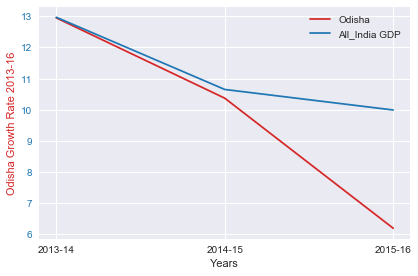

In [122]:
# Home State Growth vs National Avg
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Odisha Growth Rate 2013-16', color=color)
ax1.plot(state_growth_rows_after2013['Duration'], state_growth_rows_after2013['Odisha'], color=color)

color = 'tab:blue'
ax1.plot(state_growth_rows_after2013['Duration'], state_growth_rows_after2013['All_India GDP'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

**Observation**: Seeing the above graph we can make out that Odisha growth rate has been on par with All India Rate initially in the year 2013-14, slightly dipped for year 2014-15. However, it dipped considerably in year 2015-16 when compared to National Growth Rate

<font color=Red>**TASK**</font>
Plot the total GDP of the states for the year 2015-16
Identify the top 5 and bottom 5 states based on total GDP

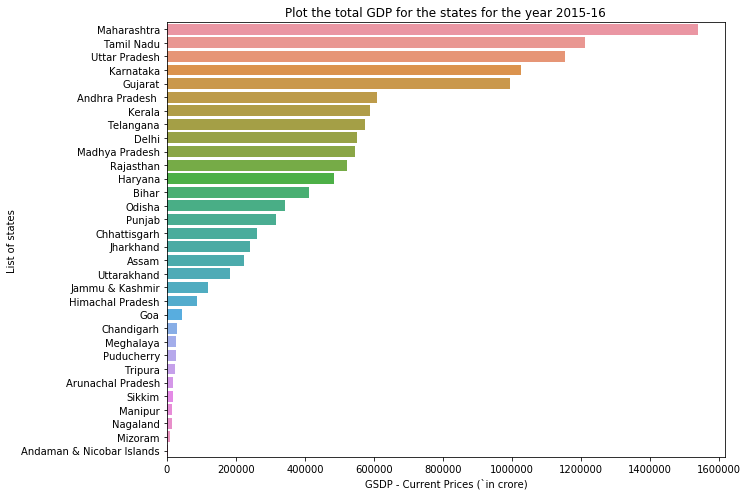

In [88]:
state_gsdp_rows = state_gsdp_rows.drop(['West Bengal1','All_India GDP'],axis=1)

state_gsdp_201516 = pd.DataFrame(state_gsdp_rows.iloc[-1,1:])
state_gsdp_201516 = state_gsdp_201516.sort_values(by='GSDP - CURRENT PRICES (` in Crore)',ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(y=state_gsdp_201516.index,x='GSDP - CURRENT PRICES (` in Crore)',data=state_gsdp_201516)
plt.title('Plot the total GDP for the states for the year 2015-16')
plt.xlabel('GSDP - Current Prices (`in crore)')
plt.ylabel('List of states')
plt.show()

In [89]:
# Identity Top 5 and Bottom 5 States
top5_state_201516 = list(state_gsdp_201516.head(5).index)
botton4_state_201516 = list(state_gsdp_201516.tail(5).index)

print("Top 5 States:")
print(top5_state_201516)

print("Bottom 5 States:")
print(botton4_state_201516)

Top 5 States:
['Maharashtra', 'Tamil Nadu', 'Uttar Pradesh', 'Karnataka', 'Gujarat']
Bottom 5 States:
['Sikkim', 'Manipur', 'Nagaland', 'Mizoram', 'Andaman & Nicobar Islands']


## Part I-B
The focus of analysis in this segment is on the state-wise datasets that contains the GSDP and percapital GSDP data for the states. This data is also split across 
- Sectors (Primariy, Secondary, Tertiary) 
- Sub-sectors (like Agriculture, forestry and fishing
- Sub-sub-sectors (like Crops, Livestock etc.)

<font color=Pink>**Assumptions**</font>
- The analysis will only be performed for the year 2014-15
- The analysis will NOT consider Union Territories (Delhi, Chandigarh etc.)

In [90]:
# Importing Additional Libraries
import glob
from os.path import splitext, basename
from matplotlib.colors import ListedColormap

In [91]:
# Read all the CSV files corresponding to all the states
mscifile = glob.glob(".\Dataset I-B\*.csv")

# dfs: Master Dictionary containing state names as keys and all the CSV data per state as the value
dfs=dict()
list_of_states = []

for fp in mscifile:
    key = splitext(basename(fp))[0].split('-')[1]
    list_of_states.append(key)
    df = pd.read_csv(fp,encoding='ISO-8859-1')
    dfs[key] = df

<font color=Blue>**Data Preparation**</font>: Comprises of 
- Slicing and Dicing data sets into convenient sub-sets that will be used / referred to multiple times during the analysis

In [92]:
# List of State Per capita GDP
list_of_states_pcgdp = []

for k in list_of_states:
    list_of_states_pcgdp.append(dfs[k]['2014-15'].iloc[-1])

In [93]:
states_pcgdp_df = pd.DataFrame({'state_names':list_of_states,'state_pcgdp':list_of_states_pcgdp})
#states_pcgdp_df = states_pcgdp_df.set_index('state_names')
states_pcgdp_df = states_pcgdp_df.sort_values(by='state_pcgdp',ascending=False)

<font color=Red>**TASK**</font>
Plot the GDP per capita for all the states
- Identify the top 5 and bottom 5 states based on GDP per capita
- Find the ratio of highest per capita GDP to the lowest per capita GDP

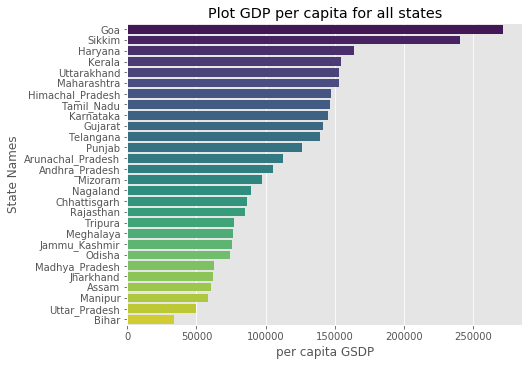

In [94]:
# Plot the GDP per capita for all the states
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

g = sns.FacetGrid(states_pcgdp_df, size=5, aspect=1.5)
g.map(sns.barplot, "state_pcgdp", "state_names", palette='viridis')

plt.title('Plot GDP per capita for all states')
plt.xlabel('per capita GSDP')
plt.ylabel('State Names')
plt.show()

In [95]:
# Identify top 5 and bottom 5 states based on GDP per capita
top5_states_pcgdp = list(states_pcgdp_df.state_names.head(5).values)
botton5_states_pcgdp = list(states_pcgdp_df.state_names.tail(5).values)

print('Top 5 states based on GDP per capita')
print(top5_states_pcgdp)

print('Bottom 5 states based on GDP per capita')
print(botton5_states_pcgdp)

Top 5 states based on GDP per capita
['Goa', 'Sikkim', 'Haryana', 'Kerala', 'Uttarakhand']
Bottom 5 states based on GDP per capita
['Jharkhand', 'Assam', 'Manipur', 'Uttar_Pradesh', 'Bihar']


In [96]:
# ratio of highest per capita GDP to the lowest per capita GDP
ration_HtoL_pcgdp = states_pcgdp_df.state_pcgdp.values[0] / states_pcgdp_df.state_pcgdp.values[-1]

print('Ratio of highest per capita GDP to the lowest per capita GDP')
print(ration_HtoL_pcgdp)

Ratio of highest per capita GDP to the lowest per capita GDP
8.00474170937


In [98]:
sectors = ['Primary','Secondary','Tertiary']

# pst_contri_df: DataFrame with % contribution of each of the sectors in each of the states
pst_contri_df = pd.DataFrame({'sectors':sectors})

for k in list_of_states:
    temp_a = dfs[k].loc[(dfs[k]['Item'] == 'Primary') | (dfs[k]['Item'] == 'Secondary') | (dfs[k]['Item'] == 'Tertiary') | (dfs[k]['Item'] == 'Gross State Domestic Product'),'2014-15'].values
    temp_a = [temp_a[i]*100/temp_a[3] for i in range(3)]
    temp_df = pd.DataFrame({k:temp_a})
    pst_contri_df = pd.concat([pst_contri_df,temp_df],axis=1)

<font color=Red>**TASK**</font> -
Plot the % contribution of primary, secondary and tertiary sectors as a % of Total GDP for all the states

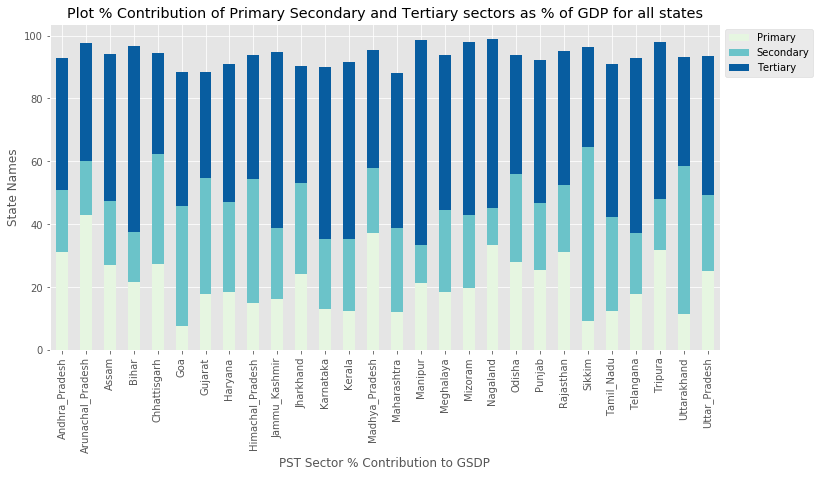

In [99]:
pst_contri_df.set_index('sectors').T.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("GnBu", 10)),figsize=(12,6))

plt.title('Plot % Contribution of Primary Secondary and Tertiary sectors as % of GDP for all states')
plt.xlabel('PST Sector % Contribution to GSDP')
plt.ylabel('State Names')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

<font color=Red>**TASK**</font> -
Catrogrize the states into 4 categories based on GDP per capita
- C1: the quantile values between 0.85 - 1
- C2: the quantile values between 0.50- 0.85
- C3: the quantile values between 0.20 - 0.50
- C4: the quantile values between 0.00 - 0.20

In [100]:
# Calcuate the quantile values

temp_pcgdp = np.flipud(states_pcgdp_df['state_pcgdp'].values)
x_85 = int(round(0.85*len(temp_pcgdp),0))
value_85 = temp_pcgdp[x_85-1]

x_50 = int(round(0.5*len(temp_pcgdp),0))
value_50 = temp_pcgdp[x_50-1]

x_20 = int(round(0.2*len(temp_pcgdp),0))
value_20 = temp_pcgdp[x_20-1]

# Create a column in states_pcgdp_df dataframe to populate the category of each state
states_pcgdp_df['Category'] = [i for i in range(len(states_pcgdp_df))]

# Populate the category of each state
for i in range(len(states_pcgdp_df)):
    if (states_pcgdp_df['state_pcgdp'].iloc[i] >= value_85):
        states_pcgdp_df['Category'].iloc[i] = 'C1'
    elif (states_pcgdp_df['state_pcgdp'].iloc[i] >= value_50):
        states_pcgdp_df['Category'].iloc[i] = 'C2'
    elif (states_pcgdp_df['state_pcgdp'].iloc[i] >= value_20):
        states_pcgdp_df['Category'].iloc[i] = 'C3'
    else:
        states_pcgdp_df['Category'].iloc[i] = 'C4'

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


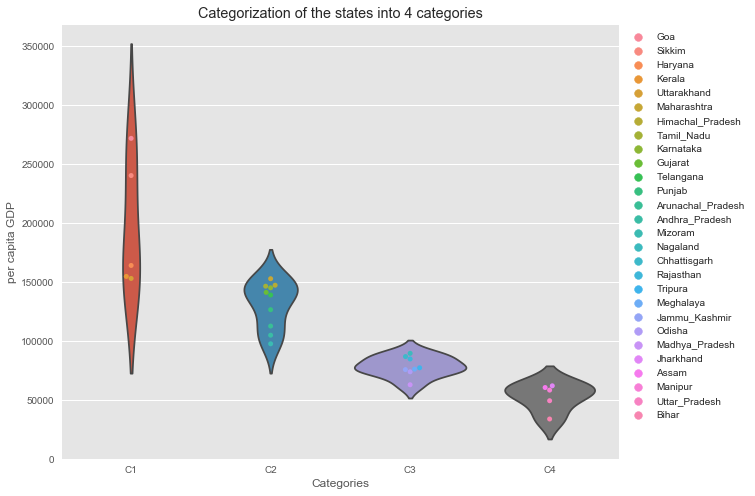

In [175]:
# Plot the categorization of the states into 4 categories by using a combination of violin plot and swarm plot
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

sns.violinplot(y="state_pcgdp", x='Category', data=states_pcgdp_df, inner=None)
ax = sns.swarmplot(y="state_pcgdp", x='Category', hue='state_names',data=states_pcgdp_df)

plt.title('Categorization of the states into 4 categories')
plt.xlabel('Categories')
plt.ylabel('per capita GDP')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

<font color=Red>**TASK**</font> - 
For each category find the top 3/4/5 sub-sectors (such as agriculture etc.) which contribute approx. 80% of the GSDP of each category

<font color=Pink>**Assumption**</font> - 
It is assumed that the following are the sub-sectors as per the information shared:
- Agriculture, forestry and fishing
- Mining and quarrying
- Manufacturing
- Electricity, gas, water supply & other utility services
- Construction
- Trade, repair, hotels and restaurants
- Transport, storage, communication & services related to broadcasting, 
- Financial services
- Real estate, ownership of dwelling & professional services
- Public administration
- Other services

In [106]:
# states_gsdp_df: A DataFrame that will contain the gsdp of each of the states'
# gsdp_per_cat_df: DataFrame with GSDP grouped per category

sub_sectors = ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services']
categories = ['C1','C2','C3','C4']
list_gsdp_per_state = [int(dfs[k].loc[dfs[k]['Item'] == 'Gross State Domestic Product','2014-15'].values) for k in list_of_states]
states_gsdp_df = states_pcgdp_df.copy()
states_gsdp_df = states_gsdp_df.drop(['state_pcgdp'],axis=1)
gsdp_per_state_df = pd.DataFrame({'state_names':list_of_states,'gsdp_per_state':list_gsdp_per_state})

states_gsdp_df = pd.merge(states_gsdp_df,gsdp_per_state_df,how='inner',on='state_names')
states_gsdp_df = states_gsdp_df.set_index('state_names')
gsdp_per_cat_df = states_gsdp_df.groupby('Category').sum()

In [107]:
# Calculating Sub-sector contribution

subcat_contri_df = pd.DataFrame({'sub_sectors':sub_sectors})

for k in list_of_states:                           
    temp_a = dfs[k].loc[dfs[k]['Item'].isin(sub_sectors),'2014-15'].values
    #gsdp_value_temp = int(dfs[k].loc[dfs[k]['Item'] == 'Gross State Domestic Product','2014-15'].values)
    #temp_a = [temp_a[i]*100/gsdp_value_temp for i in range(11)]
    temp_df = pd.DataFrame({k:temp_a})
    subcat_contri_df = pd.concat([subcat_contri_df,temp_df],axis=1)

In [108]:
subcat_contri_df.set_index('sub_sectors',inplace=True)
subcat_contri_df_tp = subcat_contri_df.transpose()

consolidated = pd.merge(states_gsdp_df,subcat_contri_df_tp,left_index=True,right_index=True)
gsdp_per_cat_per_subsec_df = consolidated.groupby('Category').sum()

gsdpp_per_cat_per_subsec_df = gsdp_per_cat_per_subsec_df.copy()

for i in range(len(gsdpp_per_cat_per_subsec_df)):
    for j in range(1,len(gsdpp_per_cat_per_subsec_df.columns)):
        gsdpp_per_cat_per_subsec_df.iloc[i,j] = gsdpp_per_cat_per_subsec_df.iloc[i,j]*100/gsdpp_per_cat_per_subsec_df.iloc[i,0]

**gsdpp_per_cat_per_subsec_df**: Has the information about the % contribution of each of the sub-sectors towards each of the categories. It also has information on the cumulative gsdp per category

In [109]:
print(gsdpp_per_cat_per_subsec_df)

          gsdp_per_state  Agriculture, forestry and fishing  \
Category                                                      
C1             118129206                          13.538762   
C2             623984698                          14.206122   
C3             182402227                          24.677777   
C4             185053897                          21.885190   

          Mining and quarrying  Manufacturing  \
Category                                        
C1                    0.705592      16.613203   
C2                    1.862495      17.309883   
C3                    6.027819      12.400959   
C4                    2.419860      11.141726   

          Electricity, gas, water supply & other utility services  \
Category                                                            
C1                                                 2.061199         
C2                                                 2.350954         
C3                                                

**Observation**: 
For C1 the top sectors contributing Approx. 80% of GSDP: 
- Manufacturing
- [Agriculture, forestry and fishing]
- [Real estate, ownership of dwelling & professional services]
- [Trade, repair, hotels and restaurants]
- Construction
- Other Services
- Transport, storage, communication & services related to broadcasting

For C2 the top sectors contributing Approx. 80% of GSDP:
- Manufacturing
- [Real estate, ownership of dwelling & professional services]
- [Agriculture, forestry and fishing]
- [Trade, repair, hotels and restaurants]
- Construction
- Other Services
- Financial Services
- Transport, storage, communication & services related to broadcasting

For C3 the top sectors contributing Approx. 80% of GSDP: 
- [Agriculture, forestry and fishing]
- Manufacturing
- [Trade, repair, hotels and restaurants]
- [Real estate, ownership of dwelling & professional services]
- Construction
- Other Services
- Transport, storage, communication & services related to broadcasting
- Public administration

For C4 the top sectors contributing Approx. 80% of GSDP: 
- [Agriculture, forestry and fishing]
- [Trade, repair, hotels and restaurants]
- [Real estate, ownership of dwelling & professional services]
- Manufacturing
- Construction
- Other Services
- Transport, storage, communication & services related to broadcasting

<font color=Red>**TASK**</font> - 
Plot the contribution of the sub-sectors as a % of the GSDP of each of the category

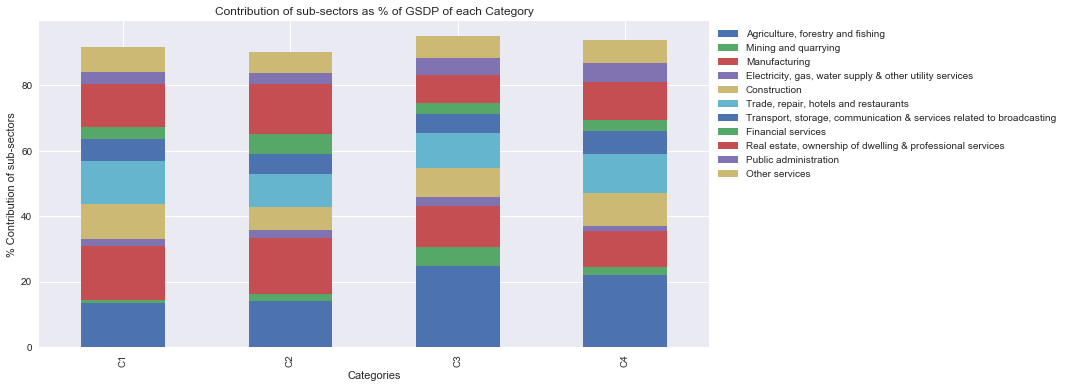

In [112]:
final_result = gsdpp_per_cat_per_subsec_df.copy()

final_result = final_result.drop(['gsdp_per_state'],axis=1)
    
sns.set()
final_result.plot(kind='bar', stacked=True,figsize=(12,6))
plt.title('Contribution of sub-sectors as % of GSDP of each Category')
plt.xlabel('Categories')
plt.ylabel('% Contribution of sub-sectors')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

<font color=Green>**Recommendations per Category to improve per capita GDP**</font>

**Recommendations**

Manufacturing and Real Estate / Professional Services seem to be positively correlated with high GDP states

1. Categories 3 and 4 need to focus on increasing Manufacturing. Need to bring in Industrialization at scale to be able to grow GDP per capita **[Applicable for C3 and 4 categories]**

2. Categories 3 and 4 need to focus on increasing Real Estate / Professional Services. Need to bring in schemes like affordable housing, attract Industries to be able to build office space, build more infrastructure for public services etc. **[Applicable for C3 and 4 categories]**

3. Focus on growing Mining sector. This seems to be struggling across categories may be due to some issues related to policy clearances. As this is mostly controlled by the Government, it needs ensure faster decision making and bring in measures like greater transparency in the system to attract investments **[Applicable for C1-4 categories]**

4. Focus on growing Financial services sector. Ensure creation of bank accounts in rural areas to ensure inclusion of more citizens in the banking systems. Bring in effective Insurance schemes to include higher number of citizens in different Insurance schemes (like Life Insurance, Health Insurance etc.) **[Applicable for C1-4 categories]**

5. Focus on Infrastructure related projected (like building Highways, Roads, Ports etc.) which will give boost to Contruction sub-sector.**[Applicable for C1-4 categories]**

## Part II
The focus of analysis in this segment is to investigate whether there is any raltionship between per capita GDP with drop-out rates in education

<font color=Pink>**Assumption**</font> -
1. Analysis only for year 2014-15 (as per instructions)
2. Analysis only for Primary, Upper Primary and Secondary levels of education done (as per instructions)
3. Senior Secondary not considered also because of multiple missing values
4. Following UTs and West Bengal are not considered in the analysis as GDP analysis for the same was not done in Part I-B above. ['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','Puducherry','West Bengal']


In [113]:
# Data Loading

dropout_df = pd.read_csv("./Dataset II/rs_session243_au570_1.1.csv")

In [114]:
# Data Preparation

dropout_subsec_df = dropout_df[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]

In [115]:
# Analyze the Data Quality

dropout_subsec_df.isnull().sum()

Level of Education - State      0
Primary - 2014-2015             4
Upper Primary - 2014-2015       2
Secondary - 2014-2015           1
Senior Secondary - 2014-2015    9
dtype: int64

**Observation**: The above results show that there are multiple null values across each of the columns. With the most being in Senior Secondary. Therefore, dropping 'Senior Secondary' column for further analysis

In [116]:
dropout_subsec_df = dropout_subsec_df.drop(['Senior Secondary - 2014-2015'],axis=1)

drop_state_list = ['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','Puducherry','West Bengal','All India']
dropout_subsec_df = dropout_subsec_df.set_index('Level of Education - State').drop(drop_state_list,axis=0)

**Observation**: Following can be observed about the data
1. There are NaN values which need to imputed
2. The state names used in the previous Part I-B analysis and the names loaded from the current dataset differ.<br>
Following operations need to be done: <br>
1.Replacing white spaces with underscore on state names column <br>
2.Standardizing Names across Index Columns of both the DataFrames to be merged

In [117]:

# Removing NaN values
for i in list(dropout_subsec_df.columns):
    dropout_subsec_df.loc[np.isnan(dropout_subsec_df[i]), i] = dropout_subsec_df[i].mean()

# Replacing white spaces with underscore on index column
dropout_subsec_df.index = (dropout_subsec_df.index.values[i].replace(" ","_") for i in range(len(dropout_subsec_df)))

# Standardizing Names across Index Columns of both the DataFrames to be merged
dropout_subsec_df.reset_index(inplace=True)
dropout_subsec_df['index'].replace('Chhatisgarh',value='Chhattisgarh',inplace=True)
dropout_subsec_df['index'].replace('Uttrakhand',value='Uttarakhand',inplace=True)
dropout_subsec_df['index'].replace('Jammu_and_Kashmir',value='Jammu_Kashmir',inplace=True)
dropout_subsec_df.set_index('index',inplace=True)

<font color=Red>**TASK**</font>
Analyze correlation of GDP per capita with droput rates in education for year 2014-15 for the states

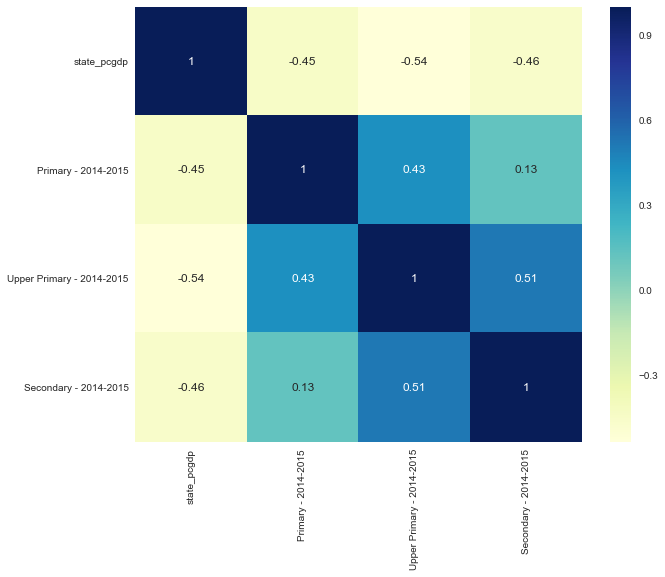

In [119]:
# Plotting a heatmap to understand the corelation of GDP per capita with dropout rates in education
temp = states_pcgdp_df.set_index('state_names')
consolidated_d2 = pd.merge(temp,dropout_subsec_df,left_index=True,right_index=True)

consolidated_d2 = consolidated_d2.drop('Category',axis=1)

cor = consolidated_d2.corr()
round(cor,3)

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

<font color=Red>**TASK**</font> - 
Wirte Key Insights you observe from data and form hypothesis

**Insights** - We can see that 
1. There is fairly strong correlation between state per capita GDP to Dropout rates in education as the values [-0.45,-0.54,-0.46] as the values are hovering near -0.5 which is fairly strong assuming the followin:

Value of r	Strength of relationship <br>
-1.0 to -0.5 or 1.0 to 0.5	Strong <br>
-0.5 to -0.3 or 0.3 to 0.5	Moderate <br>
-0.3 to -0.1 or 0.1 to 0.3	Weak <br>
-0.1 to 0.1	None or very weak <br>

2. There is negative correlation. This is expected, as more per captia GDP means that the state is more prosperous, implying that there will sustained investments in the state's budget towards education leading to higher quality of education and stronger focus on education delivery. All this is bound to lead to lower dropout levels

3. Just through EDA we can see that the drop out rates in 'Secondary Education' are subtantially higher compared to 'Primary' and 'Upper Primary'

4. In eastern states - Manipur and Nagaland (followed by Arunachal Pradesh, Mizoram, Meghalaya), the dropout rates in 'Primary Education' is substantially higher than other states. Indicating that there are substantial challenges in basic education delivery in these states. Need to focus on initiatives like Mid-day meals schemes, Ensuring electricity at schools etc. 

5. We can also see that for 'Secondary Education' higher dropout are for states with lower per capita GDP like following states - Odisha, Madhya Pradesh, Jharhand, Assam, Bihar. 

5. Karnataka and Gujarat are exceptions however, recording higher 'Secondary Education' dropouts despite of having fairly high per capita GDP

**Hypothesis** - 
1. Higher the per capita GDP, lower the drop out rates in education
2. Most of the students dropout at Secondary Education level indicating a possible shift into unorganized employment at early age to augment family income
2. More the investments into education delivery mechanisms, the lower the drop out rates in Primary Education levels